In [ ]:
!pip install datasets transformers torch evaluate
!pip install rouge_score

Some weights of GPT2ForQuestionAnswering were not initialized from the model checkpoint at distilgpt2 and are newly initialized: ['qa_outputs.weight', 'qa_outputs.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model: distilgpt2
Pipeline: <transformers.pipelines.question_answering.QuestionAnsweringPipeline object at 0x799e2ec0b040>


Filter:   0%|          | 0/100 [00:00<?, ? examples/s]

exact_match : 0.0
f1 : 4.673659673659673
total_time_in_seconds : 27.167572789999213
samples_per_second : 3.680858822868839
latency_in_seconds : 0.2716757278999921




Some weights of GPT2ForQuestionAnswering were not initialized from the model checkpoint at gpt2 and are newly initialized: ['qa_outputs.weight', 'qa_outputs.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model: gpt2
Pipeline: <transformers.pipelines.question_answering.QuestionAnsweringPipeline object at 0x799e1841d960>


Filter:   0%|          | 0/100 [00:00<?, ? examples/s]

exact_match : 0.0
f1 : 2.6578865578865583
total_time_in_seconds : 53.138526212000215
samples_per_second : 1.8818737953145774
latency_in_seconds : 0.5313852621200021




/usr/local/lib/python3.10/dist-packages/evaluate/visualization.py:47: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(*ranges[j])
/usr/local/lib/python3.10/dist-packages/evaluate/visualization.py:56: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(*ranges[j])


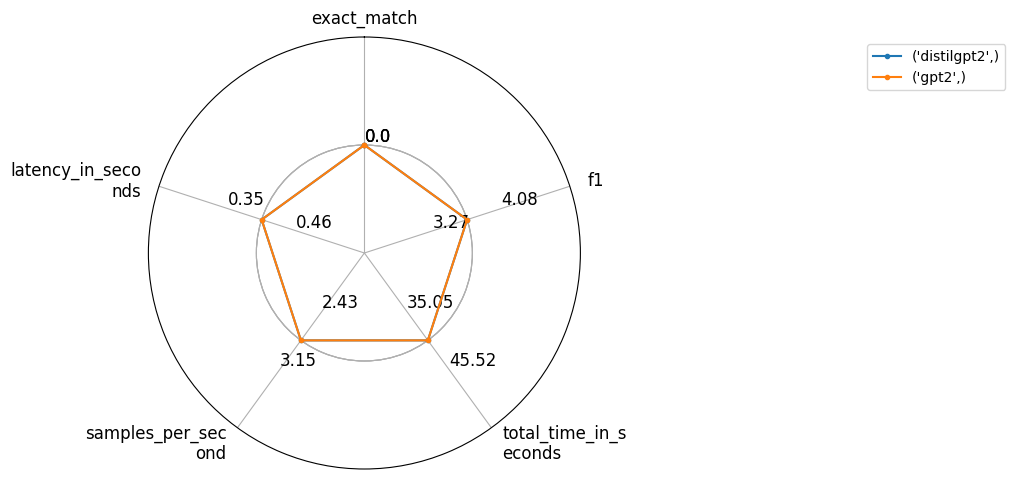

In [ ]:
from evaluate import evaluator
from evaluate.visualization import radar_plot
from datasets import load_dataset
from transformers import pipeline

task_evaluator = evaluator("question-answering")
data = load_dataset("squad", split="validation[:100]")

model_names = ["distilgpt2", "gpt2"]
results_list = []

for model_name in model_names:
  model_pipeline = pipeline("question-answering", model=model_name)
  print(f"Model: {model_name}")
  print("Pipeline:", model_pipeline)

  results = task_evaluator.compute(
    model_or_pipeline=model_pipeline,
    data=data,
    metric="squad",
  )
  results_list.append(results)

  for key in results:
    print(f"{key} : {results[key]}")
  print("\n")

plot = radar_plot(data=results_list, model_names=model_names)
plot.show()


In [ ]:
from datasets import load_dataset
from transformers import pipeline
from evaluate import evaluator, load

data = load_dataset("hellaswag", split="validation[:100]")

model_names = ["distilgpt2", "gpt2"]
results_list = []

for model_name in model_names:
    model_pipeline = pipeline("text-generation", model=model_name)
    print(f"Model: {model_name}")
    print("Pipeline:", model_pipeline)

    # 데이터 포인트에 대해 모델을 실행하고 결과를 평가
    generated_texts = []
    references = []
    for item in data:
        prompt = item['activity_label']
        generated = model_pipeline(prompt, max_length=50)[0]['generated_text']
        generated_texts.append(generated)
        references.append(item['endings'])

    rouge_evaluator = load("rouge")

    results = rouge_evaluator.compute(predictions=generated_texts, references=references)
    results_list.append({model_name: results})

for result in results_list:
    print(result)


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Model: distilgpt2
Pipeline: <transformers.pipelines.text_generation.TextGenerationPipeline object at 0x7db7cc392350>


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end gene

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Model: gpt2
Pipeline: <transformers.pipelines.text_generation.TextGenerationPipeline object at 0x7db7c5faf970>


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end gene

{'distilgpt2': {'rouge1': 0.15672481528568694, 'rouge2': 0.01881040676727489, 'rougeL': 0.12546926831101773, 'rougeLsum': 0.13037950318496763}}
{'gpt2': {'rouge1': 0.1561628131359679, 'rouge2': 0.01465170636098307, 'rougeL': 0.1198978328131987, 'rougeLsum': 0.1261416359350621}}


In [ ]:
from datasets import load_dataset
from transformers import pipeline
from evaluate import evaluator, load

data = load_dataset("hellaswag", split="validation[:100]")

model_names = ["ryusangwon/gpt2-hellaswag"]
results_list = []

for model_name in model_names:
    model_pipeline = pipeline("text-generation", model=model_name)
    print(f"Model: {model_name}")
    print("Pipeline:", model_pipeline)

    # 데이터 포인트에 대해 모델을 실행하고 결과를 평가
    generated_texts = []
    references = []
    for item in data:
        prompt = item['activity_label']
        generated = model_pipeline(prompt, max_length=50)[0]['generated_text']
        generated_texts.append(generated)
        references.append(item['endings'])

    rouge_evaluator = load("rouge")

    results = rouge_evaluator.compute(predictions=generated_texts, references=references)
    results_list.append({model_name: results})

for result in results_list:
    print(result)


config.json:   0%|          | 0.00/907 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/510M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/119 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/255 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/131 [00:00<?, ?B/s]

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Model: ryusangwon/gpt2-hellaswag
Pipeline: <transformers.pipelines.text_generation.TextGenerationPipeline object at 0x7907d04bac20>


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end gene

{'ryusangwon/gpt2-hellaswag': {'rouge1': 0.16222653297527592, 'rouge2': 0.018376808706584334, 'rougeL': 0.1223736239679252, 'rougeLsum': 0.12254426505164895}}
